In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import pandas as pd
import numpy as np

In [13]:
# change directory

os.chdir('/home/lia/Arabidopsis_pangenome/FINAL/final_screening/genes/all/statistics')

In [14]:
# import data as df
df = pd.read_csv('genes_data_plot.csv', sep='\t')
print(df)

  Chromosome   Core  Softcore  Dispensable  Private
0       chr1   3163      2622         2214       73
1       chr2   1747      1751         1409       66
2       chr3   2330      2192         1597       95
3       chr4   1054      2040         1536       65
4       chr5   2858      2149         1975       81
5      total  11152     10754         8731      380


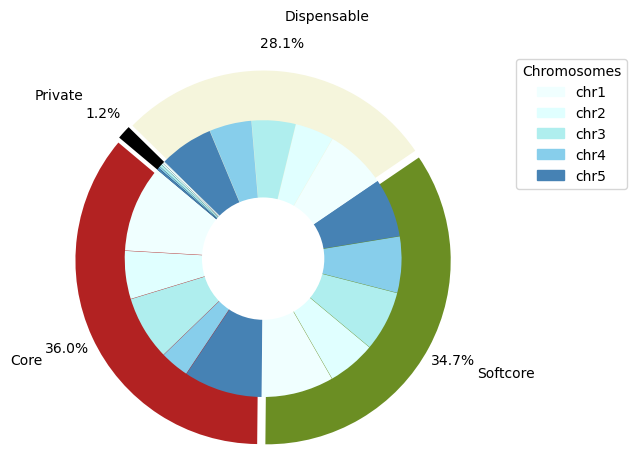

In [18]:
# Assuming df is your DataFrame and it includes a 'total' row or additional data not part of the chromosomes 'chr1' to 'chr5'

# Exclude 'total' from calculations if it's a row in your DataFrame
if 'total' in df['Chromosome'].values:
    df_filtered = df[df['Chromosome'] != 'total']
else:
    df_filtered = df

# Set 'Chromosome' as the index for easier manipulation
df_filtered = df_filtered.set_index('Chromosome')

# Calculate totals for each category without 'total'
totals = df_filtered.sum()

# Calculate contributions from each chromosome to each category
# Ensure only 'chr1' to 'chr5' are included
contributions = df_filtered.loc[['chr1', 'chr2', 'chr3', 'chr4', 'chr5']].T

# Flatten the contributions for the inner pie chart
vals = contributions.values.flatten()

# Continue with the plotting code, ensuring 'colors' and 'inner_colors' are set correctly

# Define specific colors for categories
category_colors = {
    'Core': 'firebrick',
    'Softcore': 'olivedrab',
    'Dispensable': 'beige',
    'Private': 'black'
}

# Define specific colors for chromosomes
chromosome_colors = {
    'chr1': 'azure',
    'chr2': 'lightcyan',
    'chr3': 'paleturquoise',
    'chr4': 'skyblue',
    'chr5': 'steelblue'
}

# Apply the category colors for the main slices
colors = [category_colors[cat] for cat in totals.index]

# Apply the chromosome colors for the inner slices
inner_colors = []
for cat in totals.index:
    for chrom in df['Chromosome'][:-1]:  # Assuming the last row is 'total' and should be excluded
        inner_colors.append(chromosome_colors[chrom])

# Explode for the main pie chart: a small offset for each category
explode_main = [0.03] * len(totals)  # Adjust the value as needed

# Explode for the inner pie chart: a smaller offset, repeated for each chromosome within each category
# Assuming there are 5 chromosomes ('chr1' to 'chr5') for simplicity
explode_inner = [0.005] * (len(totals) * 5)  # Adjust the value as needed

# Plot
fig, ax = plt.subplots()
ax.pie(totals, labels=totals.index, labeldistance=1.3, autopct='%1.1f%%', startangle=140, colors=colors, radius=1.2, pctdistance=1.15, explode=explode_main)

# Inner pie chart
size = 0.3
vals = contributions.values.flatten()
ax.pie(vals, radius=1.2-size, colors=inner_colors, startangle=140, explode=explode_inner)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend for chromosome colors (assuming 'chromosome_colors' is defined)
chromosome_patches = [mpatches.Patch(color=color, label=label) for label, color in chromosome_colors.items()]
plt.legend(handles=chromosome_patches, title="Chromosomes", loc="best", bbox_to_anchor=(1, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


Okay, since I didn't find a way to place the labels in a decent position I'm simply going to correct them manually.

In [20]:
# change directory

os.chdir('/home/lia/Arabidopsis_pangenome/FINAL/final_screening/pseudogenes/all/statistics')

In [21]:
# import data as df
df = pd.read_csv('pseudogenes_data_plot.csv', sep='\t')
print(df)

  Chromosome  Core  Softcore  Dispensable  Private
0       chr1    50       248         4984      760
1       chr2    42       122         3125      592
2       chr3    54       191         4002      641
3       chr4    25       174         3005      457
4       chr5    45       204         4462      711
5      total   216       939        19578     3161


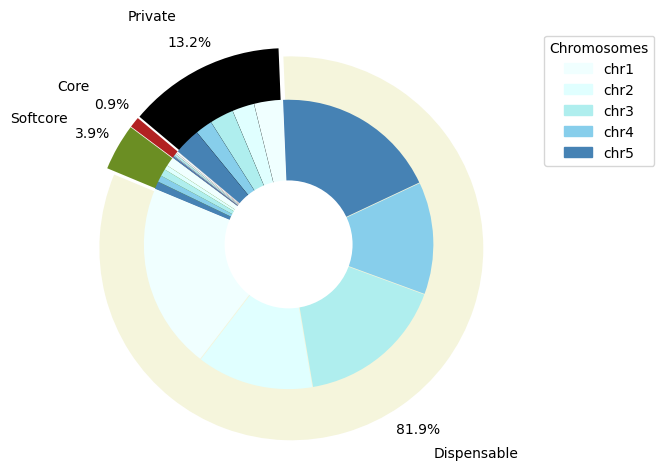

In [22]:
# Assuming df is your DataFrame and it includes a 'total' row or additional data not part of the chromosomes 'chr1' to 'chr5'

# Exclude 'total' from calculations if it's a row in your DataFrame
if 'total' in df['Chromosome'].values:
    df_filtered = df[df['Chromosome'] != 'total']
else:
    df_filtered = df

# Set 'Chromosome' as the index for easier manipulation
df_filtered = df_filtered.set_index('Chromosome')

# Calculate totals for each category without 'total'
totals = df_filtered.sum()

# Calculate contributions from each chromosome to each category
# Ensure only 'chr1' to 'chr5' are included
contributions = df_filtered.loc[['chr1', 'chr2', 'chr3', 'chr4', 'chr5']].T

# Flatten the contributions for the inner pie chart
vals = contributions.values.flatten()

# Continue with the plotting code, ensuring 'colors' and 'inner_colors' are set correctly

# Define specific colors for categories
category_colors = {
    'Core': 'firebrick',
    'Softcore': 'olivedrab',
    'Dispensable': 'beige',
    'Private': 'black'
}

# Define specific colors for chromosomes
chromosome_colors = {
    'chr1': 'azure',
    'chr2': 'lightcyan',
    'chr3': 'paleturquoise',
    'chr4': 'skyblue',
    'chr5': 'steelblue'
}

# Apply the category colors for the main slices
colors = [category_colors[cat] for cat in totals.index]

# Apply the chromosome colors for the inner slices
inner_colors = []
for cat in totals.index:
    for chrom in df['Chromosome'][:-1]:  # Assuming the last row is 'total' and should be excluded
        inner_colors.append(chromosome_colors[chrom])

# Explode for the main pie chart: a small offset for each category
explode_main = [0.03] * len(totals)  # Adjust the value as needed

# Explode for the inner pie chart: a smaller offset, repeated for each chromosome within each category
# Assuming there are 5 chromosomes ('chr1' to 'chr5') for simplicity
explode_inner = [0.005] * (len(totals) * 5)  # Adjust the value as needed

# Plot
fig, ax = plt.subplots()
ax.pie(totals, labels=totals.index, labeldistance=1.3, autopct='%1.1f%%', startangle=140, colors=colors, radius=1.2, pctdistance=1.15, explode=explode_main)

# Inner pie chart
size = 0.3
vals = contributions.values.flatten()
ax.pie(vals, radius=1.2-size, colors=inner_colors, startangle=140, explode=explode_inner)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend for chromosome colors (assuming 'chromosome_colors' is defined)
chromosome_patches = [mpatches.Patch(color=color, label=label) for label, color in chromosome_colors.items()]
plt.legend(handles=chromosome_patches, title="Chromosomes", loc="best", bbox_to_anchor=(1, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()

In [3]:
# change directory

os.chdir('/home/lia/Arabidopsis_pangenome/FINAL/node_classificaton_and_depth/all')

In [4]:
# import data as df
df = pd.read_csv('node_stats_plot.csv', sep='\t')
print(df)

  Chromosome     Core  Softcore  Dispensable  Private
0       chr1  1087812   1625008      3603197  1590443
1       chr2   607954   1202256      2473308   897586
2       chr3   693488   1359986      3101820  1100942
3       chr4   620987   1125581      2424371   821831
4       chr5   929261   1420097      2655858  1049457
5      total  3939502   6732928     14258554  5460259


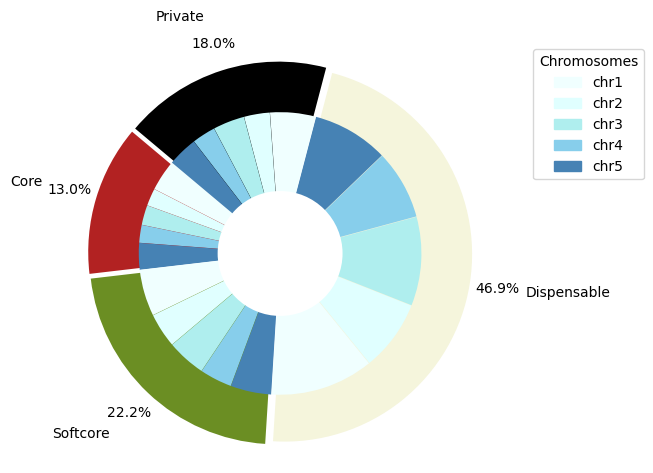

In [5]:
# Assuming df is your DataFrame and it includes a 'total' row or additional data not part of the chromosomes 'chr1' to 'chr5'

# Exclude 'total' from calculations if it's a row in your DataFrame
if 'total' in df['Chromosome'].values:
    df_filtered = df[df['Chromosome'] != 'total']
else:
    df_filtered = df

# Set 'Chromosome' as the index for easier manipulation
df_filtered = df_filtered.set_index('Chromosome')

# Calculate totals for each category without 'total'
totals = df_filtered.sum()

# Calculate contributions from each chromosome to each category
# Ensure only 'chr1' to 'chr5' are included
contributions = df_filtered.loc[['chr1', 'chr2', 'chr3', 'chr4', 'chr5']].T

# Flatten the contributions for the inner pie chart
vals = contributions.values.flatten()

# Continue with the plotting code, ensuring 'colors' and 'inner_colors' are set correctly

# Define specific colors for categories
category_colors = {
    'Core': 'firebrick',
    'Softcore': 'olivedrab',
    'Dispensable': 'beige',
    'Private': 'black'
}

# Define specific colors for chromosomes
chromosome_colors = {
    'chr1': 'azure',
    'chr2': 'lightcyan',
    'chr3': 'paleturquoise',
    'chr4': 'skyblue',
    'chr5': 'steelblue'
}

# Apply the category colors for the main slices
colors = [category_colors[cat] for cat in totals.index]

# Apply the chromosome colors for the inner slices
inner_colors = []
for cat in totals.index:
    for chrom in df['Chromosome'][:-1]:  # Assuming the last row is 'total' and should be excluded
        inner_colors.append(chromosome_colors[chrom])

# Explode for the main pie chart: a small offset for each category
explode_main = [0.03] * len(totals)  # Adjust the value as needed

# Explode for the inner pie chart: a smaller offset, repeated for each chromosome within each category
# Assuming there are 5 chromosomes ('chr1' to 'chr5') for simplicity
explode_inner = [0.005] * (len(totals) * 5)  # Adjust the value as needed

# Plot
fig, ax = plt.subplots()
ax.pie(totals, labels=totals.index, labeldistance=1.3, autopct='%1.1f%%', startangle=140, colors=colors, radius=1.2, pctdistance=1.15, explode=explode_main)

# Inner pie chart
size = 0.3
vals = contributions.values.flatten()
ax.pie(vals, radius=1.2-size, colors=inner_colors, startangle=140, explode=explode_inner)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend for chromosome colors (assuming 'chromosome_colors' is defined)
chromosome_patches = [mpatches.Patch(color=color, label=label) for label, color in chromosome_colors.items()]
plt.legend(handles=chromosome_patches, title="Chromosomes", loc="best", bbox_to_anchor=(1, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()